In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/daily-website-visitors.csv")

In [5]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [6]:
df.shape

(2167, 8)

In [7]:
df.isnull().sum()

,0
Row,0
Day,0
Day.Of.Week,0
Date,0
Page.Loads,0
Unique.Visits,0
First.Time.Visits,0
Returning.Visits,0


In [8]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [9]:
#converting the values into numeric and then replacing , with nothing for further analysis
df["Unique.Visits"] = pd.to_numeric(df["Unique.Visits"].str.replace(',', ''), errors='coerce')
df["First.Time.Visits"] = pd.to_numeric(df["First.Time.Visits"].str.replace(',', ''), errors='coerce')
df["Page.Loads"] = pd.to_numeric(df["Page.Loads"].str.replace(',', ''), errors='coerce')
df["Returning.Visits"] = pd.to_numeric(df["Returning.Visits"].str.replace(',', ''), errors='coerce')


In [10]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236


In [11]:
df["Date"] = pd.to_datetime(df["Date"]).dt.date
df["Year"] = pd.to_datetime(df["Date"]).dt.year


 Traffic Growth Over Time

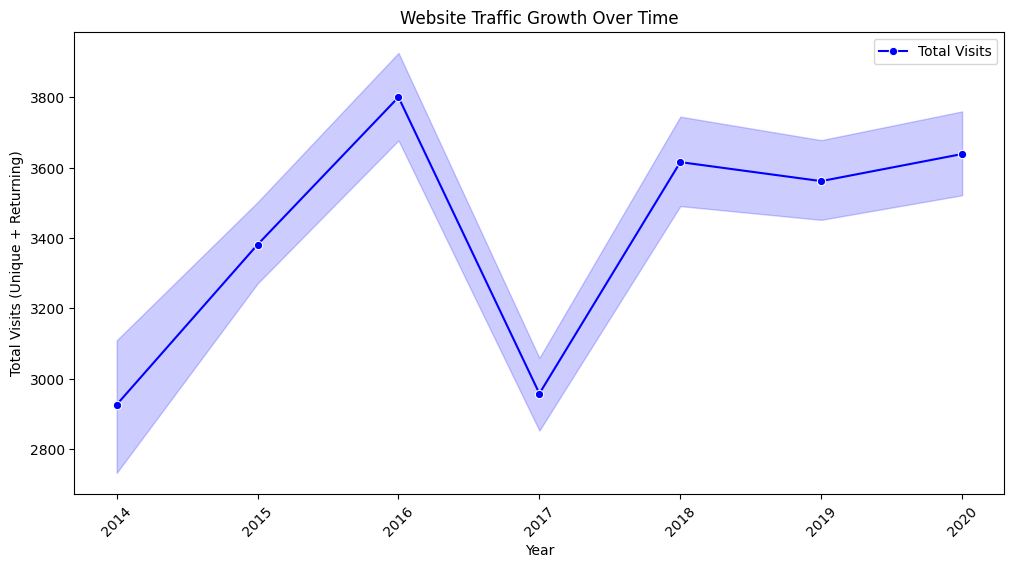

In [12]:
df['Total Visits'] = df['Unique.Visits'] + df['Returning.Visits']

# Plotting total visits over the years
plt.figure(figsize = (12,6))
sns.lineplot(x=df['Year'], y=df['Total Visits'], data=df, marker='o', color='b', label='Total Visits')

plt.title("Website Traffic Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Total Visits (Unique + Returning)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

 Trend of Unique Visits Over Time
python


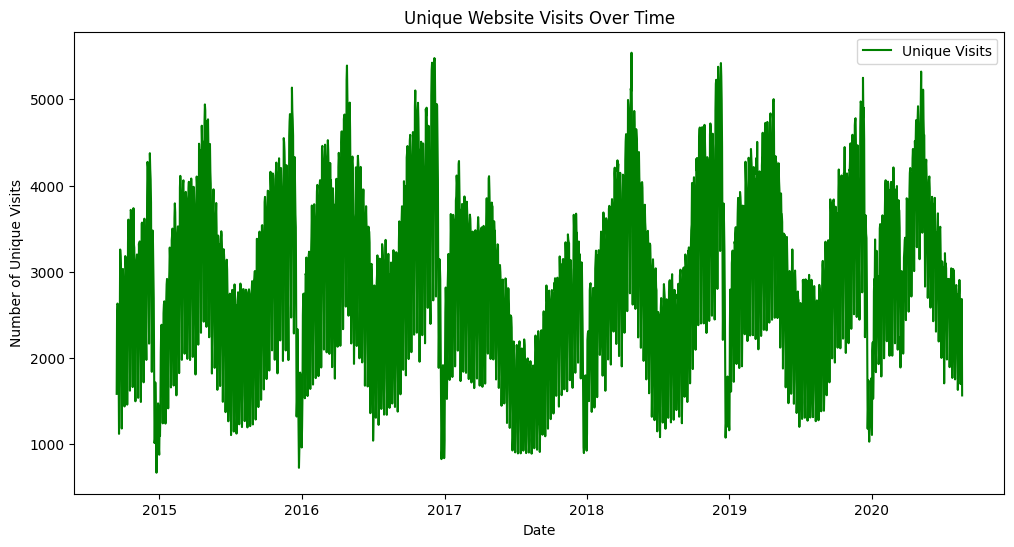

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Unique.Visits"] ,color = "green",label="Unique Visits")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Unique Visits")
plt.title("Unique Website Visits Over Time")
plt.legend()
plt.show()

 First-Time vs Returning Visits


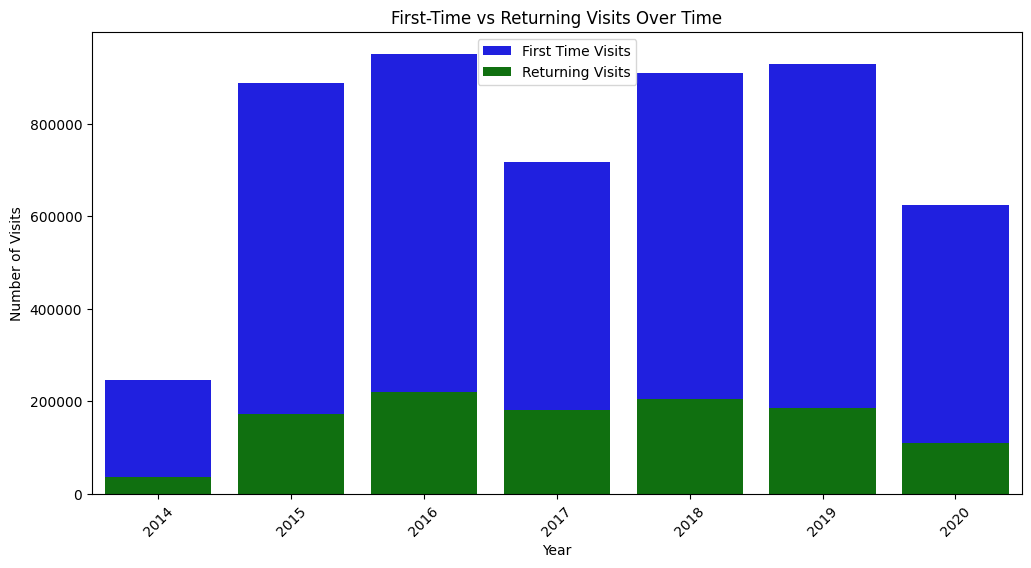

In [14]:
# Grouping by Year to compare first-time vs returning visits
df_grouped = df.groupby('Year')[['First.Time.Visits', 'Returning.Visits']].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='First.Time.Visits', data=df_grouped, color='blue', label='First Time Visits')
sns.barplot(x='Year', y='Returning.Visits', data=df_grouped, color='green', label='Returning Visits')

plt.title("First-Time vs Returning Visits Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Visits")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Daily Website Traffic Distribution

<ipython-input-15-6b26068188a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Day"], y=df["Unique.Visits"], palette="coolwarm")


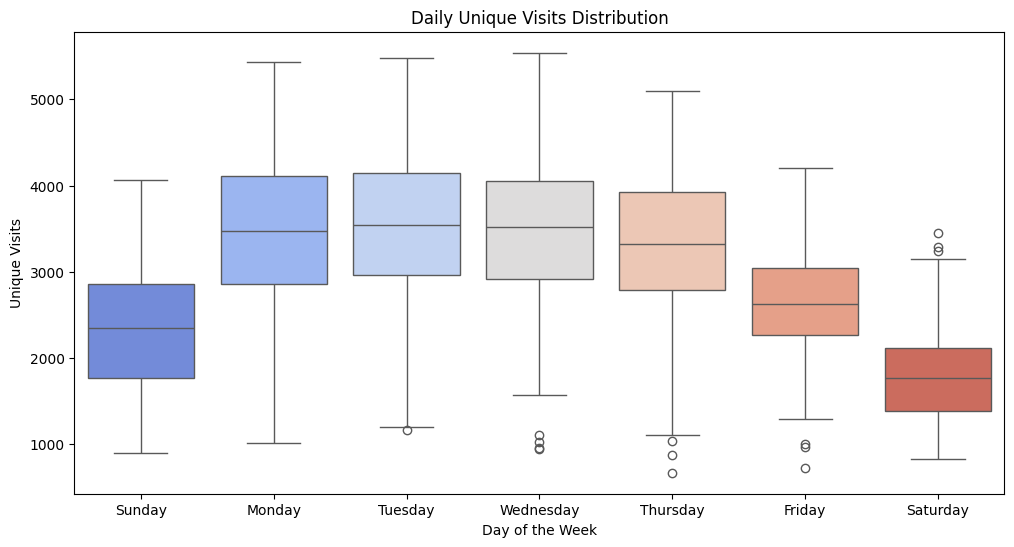

In [15]:
plt.figure(figsize=(12, 6))

# Plot box plot for daily unique visits
sns.boxplot(x=df["Day"], y=df["Unique.Visits"], palette="coolwarm")

# Labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Unique Visits")
plt.title("Daily Unique Visits Distribution")
plt.show()


Average Weekly Visitors

<ipython-input-16-e9da708d9590>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_avg.index, y=weekly_avg.values, palette="viridis")


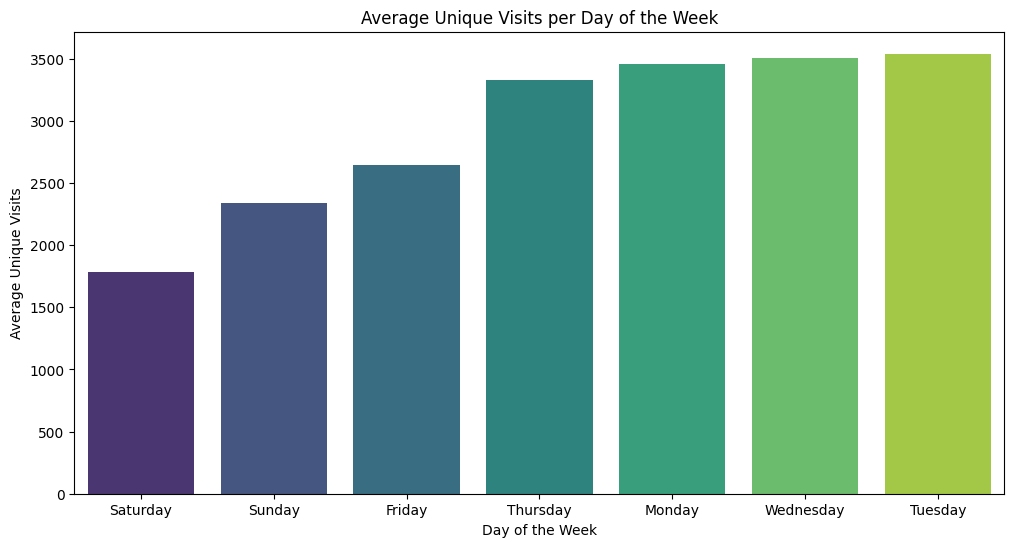

In [16]:
# Calculate weekly average visitors
weekly_avg = df.groupby("Day")["Unique.Visits"].mean().sort_values()

plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=weekly_avg.index, y=weekly_avg.values, palette="viridis")

# Labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Unique Visits")
plt.title("Average Unique Visits per Day of the Week")
plt.show()


correlational heatmap

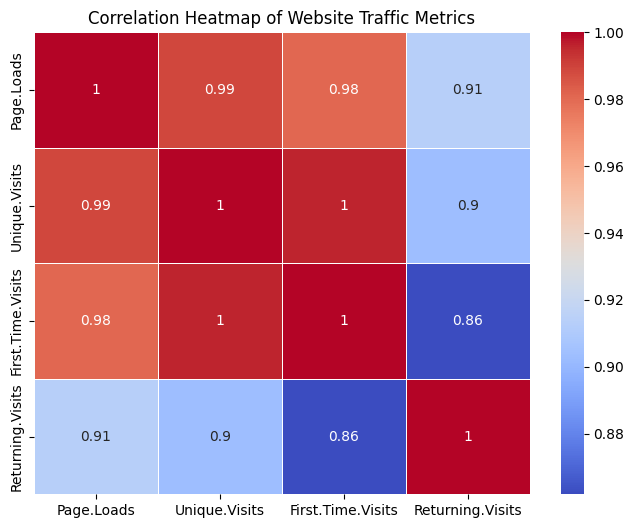

In [17]:

corr_matrix = df[["Page.Loads", "Unique.Visits", "First.Time.Visits", "Returning.Visits"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Website Traffic Metrics")
plt.show()

 Weekday vs. Weekend Traffic Comparison
python


<ipython-input-18-2808f716284a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Is_Weekend"], y=df["Unique.Visits"], palette=["blue", "red"])


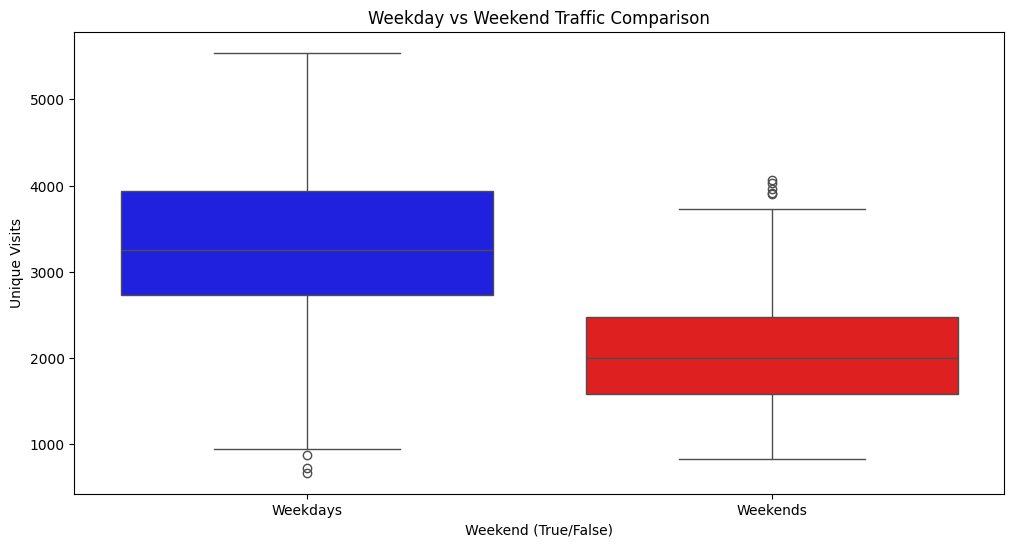

In [18]:
plt.figure(figsize=(12, 6))

# Categorize days into weekday/weekend
df["Is_Weekend"] = df["Day"].isin(["Saturday", "Sunday"])

# Boxplot for traffic comparison
sns.boxplot(x=df["Is_Weekend"], y=df["Unique.Visits"], palette=["blue", "red"])

# Labels and title
plt.xlabel("Weekend (True/False)")
plt.ylabel("Unique Visits")
plt.title("Weekday vs Weekend Traffic Comparison")
plt.xticks([0, 1], ["Weekdays", "Weekends"])
plt.show()


Visitor growth over the year

<ipython-input-19-0ee0402941b8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_visits.index, y=yearly_visits.values, palette="viridis")


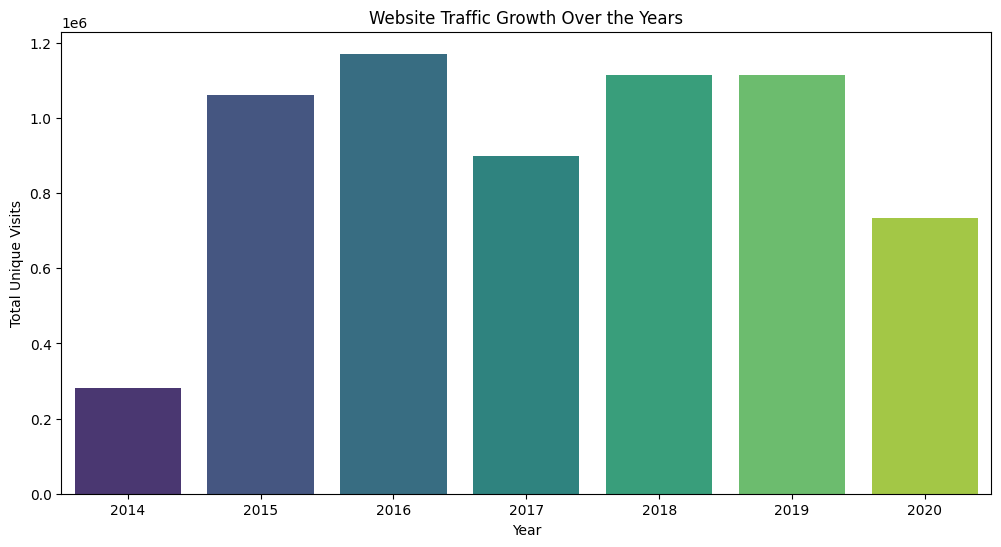

In [19]:
plt.figure(figsize=(12, 6))

# Extract year and group by yearly traffic
df["Year"] = pd.to_datetime(df["Date"]).dt.year
yearly_visits = df.groupby("Year")["Unique.Visits"].sum()

# Plot bar chart
sns.barplot(x=yearly_visits.index, y=yearly_visits.values, palette="viridis")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Unique Visits")
plt.title("Website Traffic Growth Over the Years")
plt.show()


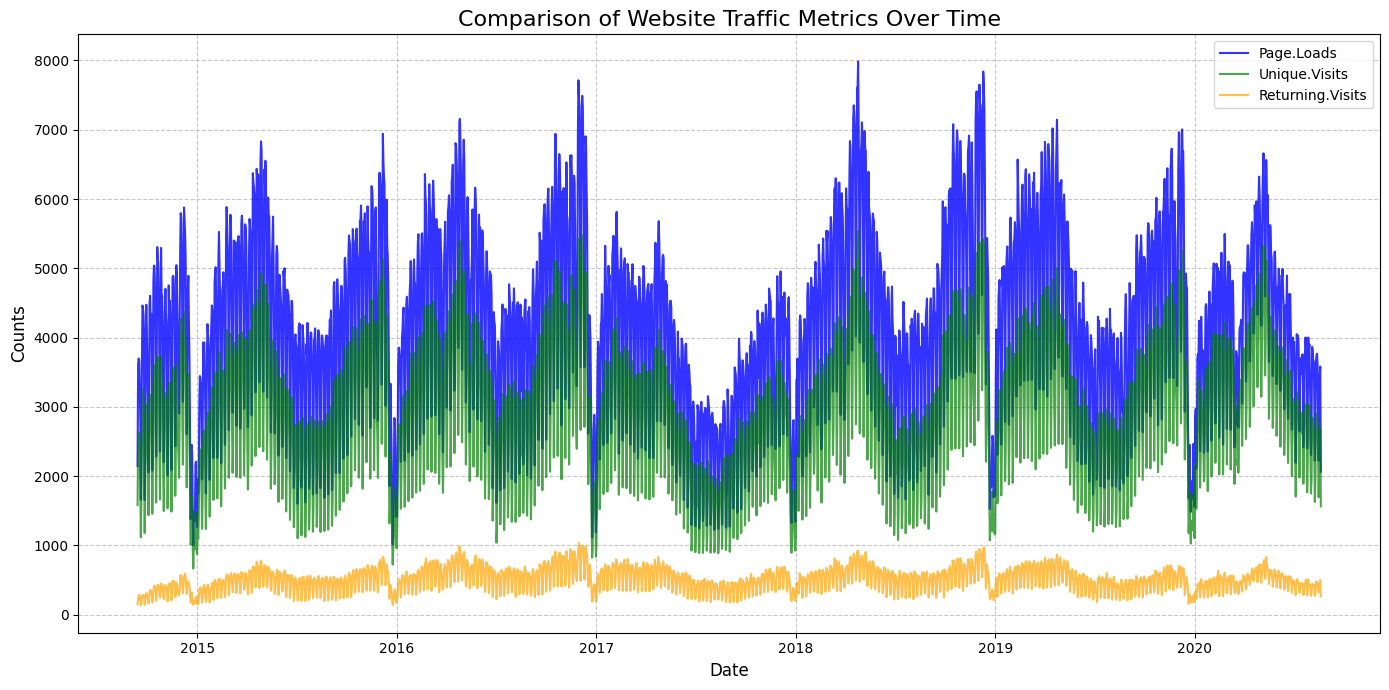

In [20]:
# Visualization: Comparing Page Loads, Unique Visits, and Returning Visits Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Page.Loads'], label='Page.Loads', color='blue', alpha=0.8)
plt.plot(df['Date'], df['Unique.Visits'], label='Unique.Visits', color='green', alpha=0.7)
plt.plot(df['Date'], df['Returning.Visits'], label='Returning.Visits', color='orange', alpha=0.7)
plt.title('Comparison of Website Traffic Metrics Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Bounce Rate vs Returning Visitors Scatter Plot


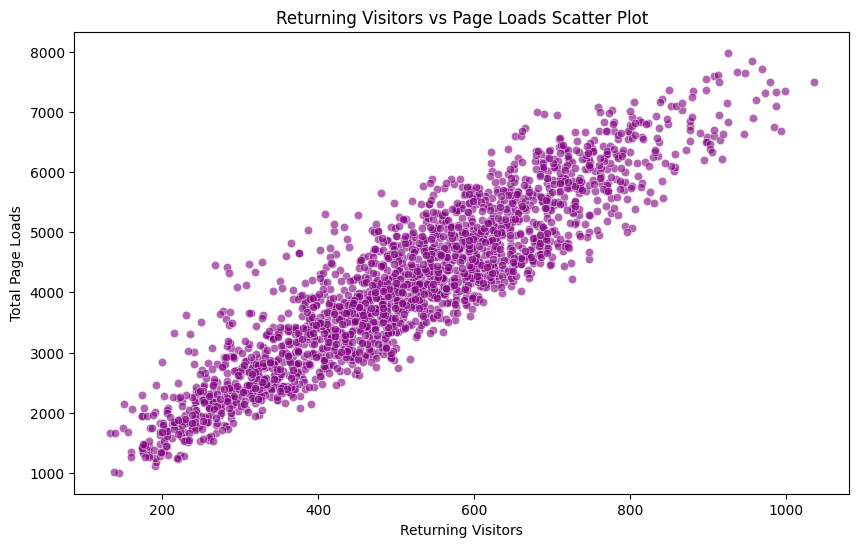

In [21]:
plt.figure(figsize=(10, 6))

# Create a scatter plot for Returning Visits vs Page Loads
sns.scatterplot(x=df["Returning.Visits"], y=df["Page.Loads"], alpha=0.6, color="purple")

# Labels and title
plt.xlabel("Returning Visitors")
plt.ylabel("Total Page Loads")
plt.title("Returning Visitors vs Page Loads Scatter Plot")
plt.show()


FEATURE SEELCTION


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [23]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Year,Total Visits,Is_Weekend
0,1,Sunday,1,2014-09-14,2146,1582,1430,152,2014,1734,True
1,2,Monday,2,2014-09-15,3621,2528,2297,231,2014,2759,False
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278,2014,2908,False
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287,2014,2901,False
4,5,Thursday,5,2014-09-18,3316,2366,2130,236,2014,2602,False


In [24]:
#label encoding converting to numerical values
lb = LabelEncoder()
df["Day"] = lb.fit_transform(df["Day"])

             Feature  Importance
6       Total Visits    0.863104
2      Unique.Visits    0.123480
5               Year    0.008239
3  First.Time.Visits    0.002146
4   Returning.Visits    0.001703
1        Day.Of.Week    0.000652
0                Day    0.000545
7         Is_Weekend    0.000132


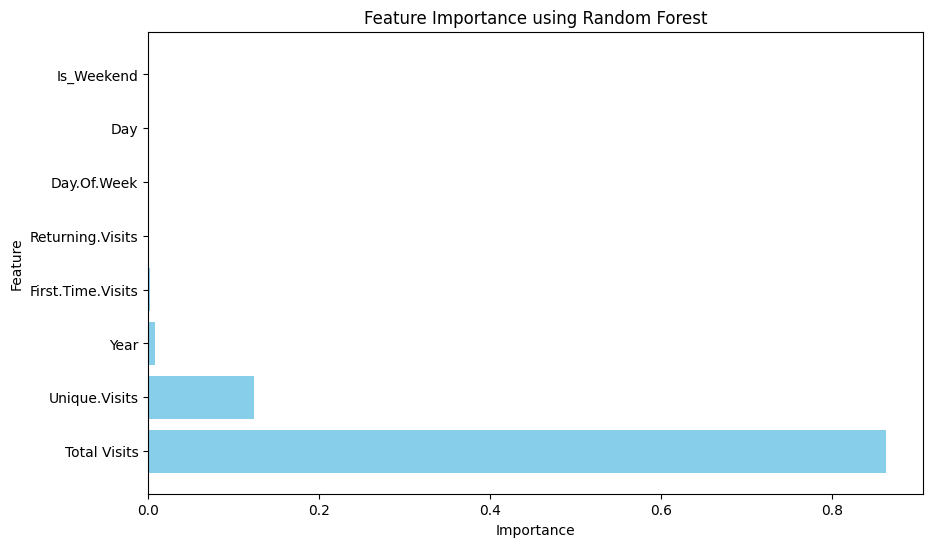

In [25]:

# Features and Target
X = df.drop(["Page.Loads", "Date","Row"], axis=1)  # Exclude 'Page.Loads' as it's the target
y = df['Page.Loads']  # Target variable



# Drop 'Date' if it's no longer needed
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Lasso is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso regression model
rf = RandomForestRegressor() # alpha controls the strength of regularization
rf.fit(X_train_scaled, y_train)

# Get the coefficients (importance of features)
importance = rf.feature_importances_

# Create a DataFrame to display features and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.show()



In [36]:
  # Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Features and Target (after feature selection based on importance)
selected_features = ['Total Visits', 'Unique.Visits', 'Year', 'First.Time.Visits',
                     'Returning.Visits', 'Day.Of.Week', 'Day', 'Is_Weekend']

X = df[selected_features]  # Using selected features
y = df['Page.Loads']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Important for models like Lasso and Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    # Print results
    print(f"{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f} (This can be seen as 'accuracy' for regression)")
    print(f"Explained Variance Score: {evs:.4f}")
    print("-" * 50)


Linear Regression Results:
MSE: 38904.5023
RMSE: 38904.5023
R²: 0.9792 (This can be seen as 'accuracy' for regression)
Explained Variance Score: 0.9792
--------------------------------------------------
Random Forest Results:
MSE: 20846.0086
RMSE: 20846.0086
R²: 0.9888 (This can be seen as 'accuracy' for regression)
Explained Variance Score: 0.9888
--------------------------------------------------
Decision Tree Results:
MSE: 34014.2742
RMSE: 34014.2742
R²: 0.9818 (This can be seen as 'accuracy' for regression)
Explained Variance Score: 0.9818
--------------------------------------------------
Gradient Boosting Results:
MSE: 17757.6054
RMSE: 17757.6054
R²: 0.9905 (This can be seen as 'accuracy' for regression)
Explained Variance Score: 0.9905
--------------------------------------------------


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 5, 7],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'subsample': [0.8, 1.0]  # Subsampling ratio
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Retrain the model with the best parameters
best_gbr = grid_search.best_estimator_
best_gbr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tuned = best_gbr.predict(X_test_scaled)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
evs_tuned = explained_variance_score(y_test, y_pred_tuned)

print(f"Tuned MSE: {mse_tuned:.4f}")
print(f"Tuned RMSE: {rmse_tuned:.4f}")
print(f"Tuned R²: {r2_tuned:.4f}")
print(f"Tuned Explained Variance Score: {evs_tuned:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.8}
Tuned MSE: 17259.3910
Tuned RMSE: 17259.3910
Tuned R²: 0.9908
Tuned Explained Variance Score: 0.9908
